# Produção Energética e Sustentabilidade

### Descrição

A energia solar é uma das principais fontes de energias renováveis, desempenhando não só um papel fundamental na transição para fontes de energia limpa e renovável, mas também na promoção da sustentabilidade ambiental. Nesse contexto, além de ser crucial otimizar o uso da energia solar, a relação entre o gasto e a produção energética é essencial para permitir um planeamento eficaz do consumo energético e a integração harmoniosa de sistemas de energia solar em redes elétricas existentes.

Nesse sentido, a 6ª Edição da Competição ML @SBS/DAA consiste no desenvolvimento de modelos de Machine Learning capazes de prever, com precisão, a quantidade de energia elétrica, em kWh, gerada por painéis solares e injectada na rede eléctrica existente a cada hora do dia com base numa ampla gama de atributos, que vão desde dados meteorológicos e informações geográficas, ao histórico de gasto e produção energética.

Este é, portanto, um problema de previsão de energia com impacto significativo na eficiência energética, mas também na redução das emissões de gases com efeito estufa e na promoção da sustentabilidade. Com isso em consideração, foi colecionado um dataset que contém diversos dados referentes à produção energética de determinados painéis solares na cidade de Braga (o dataset cobre um período que vai desde setembro de 2021 até abril de 2023).

### Objetivo

O objetivo de cada grupo de trabalho passa por desenvolver o melhor modelo possível capaz de prever a quantidade de energia, em kWh, produzida por painéis solares e injectada, em redes elétricas existentes, a cada hora do dia.

O dataset utilizado nesta competição contém um conjunto de features sendo de destacar a feature Injeção na rede (kWh) . Esta feature indica, numa escala qualitativa (None, Low, Medium, High e Very_High), a quantidade de energia que se injectou na rede elétrica num determinado ponto temporal (i.e., numa determinada hora de um determinado dia). Se o valor desta feature for None, significa que não foi injectada nenhuma energia na rede (ou porque nada foi obtido dos painéis solares, ou porque toda a energia produzida pelos painéis foi consumida localmente). Um valor de Very_High implica a existência de uma quantidade muito alta de energia injectada na rede eléctrica naquele ponto temporal.

Para treino e tuning dos modelos de Machine Learning ser-vos-ão disponibilizados dois datasets com dados energéticos e dois datasets com dados meteorológicos. Tantos os datasets energéticos como os meteorológicos estão divididos por data, i.e., um dos datasets cobre o período de 2021 enquanto que o outro cobre todo o ano de 2022. Os grupos de trabalho poderão adicionar aos datasets qualquer atributo que achem relevante.

Para obtenção de scores na competição, os grupos de trabalho deverão prever, para cada registo do dataset de teste ("energia_202301-202304.csv"), a quantidade de energia que se injectou na rede elétrica num determinado ponto temporal, utilizando a escala None, Low, Medium, High e Very_High.

### Os dados

São disponibilizados dois tipos de datasets, i.e., um tipo com dados energéticos e outro tipo com dados meteorológicos. Além disso, cada tipo de dataset está dividido por data, i.e., um dos datasets cobre o período de 2021 enquanto que o outro cobre todo o ano de 2022. Em resumo, são disponibilizados quatro datasets para treino e tuning dos modelos de Machine Learning

Features dos Datasets de Energia

- **Data** - o timestamp associado ao registo, ao dia;
- **Hora** - a hora associada ao registo;
- **Normal (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado normal em ciclos bi-horário diários (horas fora de vazio);
- **Horário Económico (kWh)** - quantidade de energia eléctrica consumida, em kWh e proveniente da rede eléctrica, num período considerado económico em ciclos bi-horário diários (horas de vazio);
- **Autoconsumo (kWh)** - quantidade de energia eléctrica consumida, em kWh, proveniente dos painéis solares;
- **Injeção na rede (kWh)** - quantidade de energia eléctrica injectada na rede eléctrica, em kWh, proveniente dos painéis solares.

Features dos Datasets Meteorológicos

- **dt** - o timestamp associado ao registo;
- **dt_iso** - a data associada ao registo, ao segundo;
- **city_name** - o local em causa;
- **temp** - temperatura em ºC;
- **feels_like** - sensação térmica em ºC;
- **temp_min** - temperatura mínima sentida em ºC;
- **temp_max** - temperatura máxima sentida em ºC;
- **pressure** - pressão atmosférica sentida em atm;
- **sea_level** - pressão atmosférica sentida ao nível do mar em atm;
- **grnd_level** - pressão atmosférica sentida à altitude local em atm;
- **humidity** - humidade em percentagem;
- **wind_speed** - velocidade do vento em metros por segundo;
- **rain_1h** - valor médio de precipitação;
- **clouds_all** - nível de nebulosidade em percentagem;
- **weather_description** - avaliação qualitativa do estado do tempo.


## Importar Bibliotecas

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Outras bibliotecas a importar mais tarde
%matplotlib inline

## Carregar os Datasets

In [169]:
energia2021 = pd.read_csv('datasets/energia_202109-202112.csv', encoding = "ISO-8859-1")
energia2022 = pd.read_csv('datasets/energia_202201-202212.csv', encoding = "ISO-8859-1")
energia2023 = pd.read_csv('datasets/energia_202301-202304.csv', encoding = "ISO-8859-1")

meteo2021 = pd.read_csv('datasets/meteo_202109-202112.csv')
meteo2022 = pd.read_csv('datasets/meteo_202201-202212.csv')
meteo2023 = pd.read_csv('datasets/meteo_202301-202304.csv')

Verificar as colunas de cada dataset

In [170]:
print(energia2021.columns)
print(energia2022.columns)
print(energia2023.columns)
print(meteo2021.columns)
print(meteo2022.columns)
print(meteo2023.columns)

Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)', 'Injeção na rede (kWh)'],
      dtype='object')
Index(['Data', 'Hora', 'Normal (kWh)', 'Horário Económico (kWh)',
       'Autoconsumo (kWh)'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidity',
       'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'],
      dtype='object')
Index(['dt', 'dt_iso', 'city_name', 'temp', 'feels_like', 'temp_min',
       'temp_max', 'pressure', 'sea_level', 'grnd_level', 'humidi

In [171]:
print(energia2021.info())
print()
print(energia2022.info())
print()
print(energia2023.info())
print()
print(meteo2021.info())
print()
print(meteo2022.info())
print()
print(meteo2023.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     2256 non-null   object 
 1   Hora                     2256 non-null   int64  
 2   Normal (kWh)             2256 non-null   float64
 3   Horário Económico (kWh)  2256 non-null   float64
 4   Autoconsumo (kWh)        2256 non-null   float64
 5   Injeção na rede (kWh)    566 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 105.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     8760 non-null   object 
 1   Hora                     8760 non-null   int64  
 2   Normal (kWh)             8760 non-null   float64
 3   Horário Eco

Conclusão: as colunas são as mesmas

Próximo passo: Concatenar os datasets

In [172]:
frames_energia = [energia2021, energia2022]
frames_meteo = [meteo2021, meteo2022]

frames = frames_energia + frames_meteo

energia = pd.concat(frames_energia)
meteo = pd.concat(frames_meteo)

meteo.rename(columns={'dt': 'Timestamp','dt_iso':'Data', 'city_name':'Nome da Cidade', 'temp':'Temperatura (ºC)', 'feels_like': 'Sensação Térmica (ºC)', 'temp_min': 'Temperatura Mínima (ºC)', 'temp_max': 'Temperatura Máxima (ºC)', 'pressure': 'Pressão Atmosférica (atm)', 'sea_level': 'Pressão atmosférica no nível do mar (atm)', 'grnd_level': 'Pressão atmosférica na altitude local (atm)', 'humidity': 'Humidade (%)', 'wind_speed': 'Velocidade do vento (m/s)', 'rain_1h': 'Valor médio de precipitação', 'clouds_all': 'Nível de nebulosidade (%)', 'weather_description': 'Avaliação qualitativa do estado do tempo'}, inplace=True)

Verificar o tamanho dos dados depois da concatenação, a presença de missing values e os tipos de dados

In [173]:
print(energia.info())
print()
print(meteo.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11016 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data                     11016 non-null  object 
 1   Hora                     11016 non-null  int64  
 2   Normal (kWh)             11016 non-null  float64
 3   Horário Económico (kWh)  11016 non-null  float64
 4   Autoconsumo (kWh)        11016 non-null  float64
 5   Injeção na rede (kWh)    3239 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 602.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 11688 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Timestamp                                    11688 non-null  int64  
 1   Data                                         11688 non-null  objec

In [174]:
print(meteo.head())
print(energia.head())

    Timestamp                           Data Nome da Cidade  Temperatura (ºC)  \
0  1630454400  2021-09-01 00:00:00 +0000 UTC          local             18.74   
1  1630458000  2021-09-01 01:00:00 +0000 UTC          local             18.73   
2  1630461600  2021-09-01 02:00:00 +0000 UTC          local             17.84   
3  1630465200  2021-09-01 03:00:00 +0000 UTC          local             18.27   
4  1630468800  2021-09-01 04:00:00 +0000 UTC          local             17.81   

   Sensação Térmica (ºC)  Temperatura Mínima (ºC)  Temperatura Máxima (ºC)  \
0                  18.84                    15.72                    20.34   
1                  18.83                    15.72                    20.34   
2                  17.98                    16.72                    20.34   
3                  18.40                    16.68                    20.34   
4                  17.97                    16.12                    20.34   

   Pressão Atmosférica (atm)  Pressão atmosf

Juntar num único dataset. Precisamos de agrupar os dados metereológicos às medições de energia correspondentes.
Agrupar por Data e Hora.

In [175]:
# Está a dar erro no formato
meteo['Data'] = pd.to_datetime(meteo['Data'], format='%Y-%m-%d %H:%M:%S +0000 UTC', errors='coerce') # 2021-09-01 00:00:00 +0000 UTC
meteo.head()
#meteo.info()

,Timestamp,Data,Nome da Cidade,Temperatura (ºC),Sensação Térmica (ºC),Temperatura Mínima (ºC),Temperatura Máxima (ºC),Pressão Atmosférica (atm),Pressão atmosférica no nível do mar (atm),Pressão atmosférica na altitude local (atm),Humidade (%),Velocidade do vento (m/s),Valor médio de precipitação,Nível de nebulosidade (%),Avaliação qualitativa do estado do tempo
0,1630454400,2021-09-01 00:00:00,local,18.74,18.84,15.72,20.34,1015,NaN,NaN,83,1.18,NaN,78,broken clouds
1,1630458000,2021-09-01 01:00:00,local,18.73,18.83,15.72,20.34,1014,NaN,NaN,83,1.46,NaN,92,overcast clouds
2,1630461600,2021-09-01 02:00:00,local,17.84,17.98,16.72,20.34,1014,NaN,NaN,88,1.05,NaN,91,overcast clouds
3,1630465200,2021-09-01 03:00:00,local,18.27,18.40,16.68,20.34,1014,NaN,NaN,86,0.46,0.14,94,light rain
4,1630468800,2021-09-01 04:00:00,local,17.81,17.97,16.12,20.34,1013,NaN,NaN,89,0.93,1.26,95,moderate rain


In [176]:

energia['Data'] = pd.to_datetime(energia.apply(lambda row: f"{row['Data']} {row['Hora']}", axis=1), format='%Y-%m-%d %H', errors='coerce') 
energia.drop('Hora', axis=1, inplace=True)
energia.head()

,Data,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2021-09-29 00:00:00,0.0,0.0,0.0,NaN
1,2021-09-29 01:00:00,0.0,0.0,0.0,NaN
2,2021-09-29 02:00:00,0.0,0.0,0.0,NaN
3,2021-09-29 03:00:00,0.0,0.0,0.0,NaN
4,2021-09-29 04:00:00,0.0,0.0,0.0,NaN


### Merge aos dois datasets

In [177]:
data = pd.merge(meteo, energia, how = 'inner', on = 'Data')
data.head()

,Timestamp,Data,Nome da Cidade,Temperatura (ºC),Sensação Térmica (ºC),Temperatura Mínima (ºC),Temperatura Máxima (ºC),Pressão Atmosférica (atm),Pressão atmosférica no nível do mar (atm),Pressão atmosférica na altitude local (atm),Humidade (%),Velocidade do vento (m/s),Valor médio de precipitação,Nível de nebulosidade (%),Avaliação qualitativa do estado do tempo,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,1632873600,2021-09-29 00:00:00,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,NaN
1,1632877200,2021-09-29 01:00:00,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,NaN
2,1632880800,2021-09-29 02:00:00,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,NaN
3,1632884400,2021-09-29 03:00:00,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,NaN
4,1632888000,2021-09-29 04:00:00,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,NaN


### Preparação e Transformação dos Dados

Verificar missing values

<Axes: >

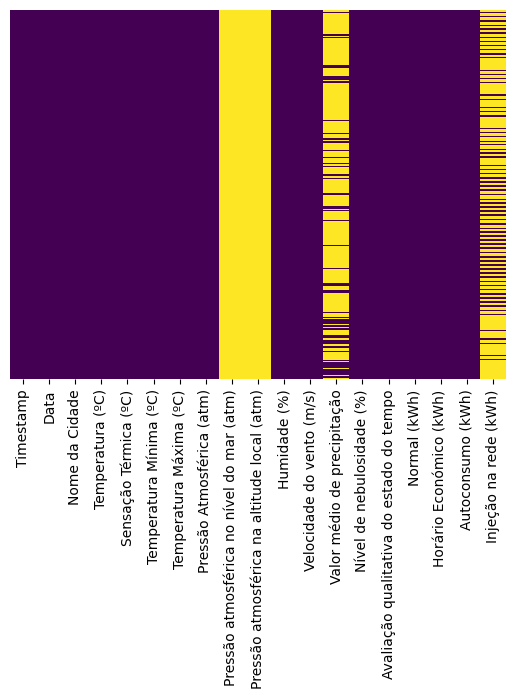

In [178]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Retirar colunas 'Pressão atmosférica no nível do mar(atm)' e 'Pressão atmosférica na altitude local(atm)'

<Axes: >

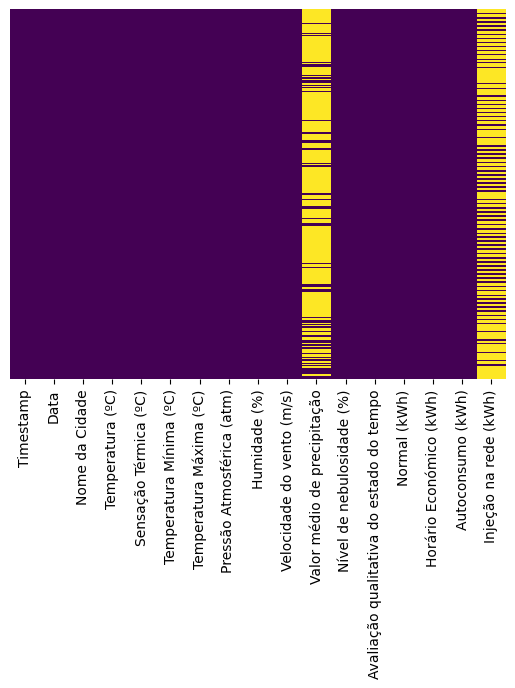

In [179]:
data.drop(['Pressão atmosférica no nível do mar (atm)', 'Pressão atmosférica na altitude local (atm)'], axis=1, inplace=True)
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Tratamento da coluna 'Valor médio de precipitação'

<Axes: >

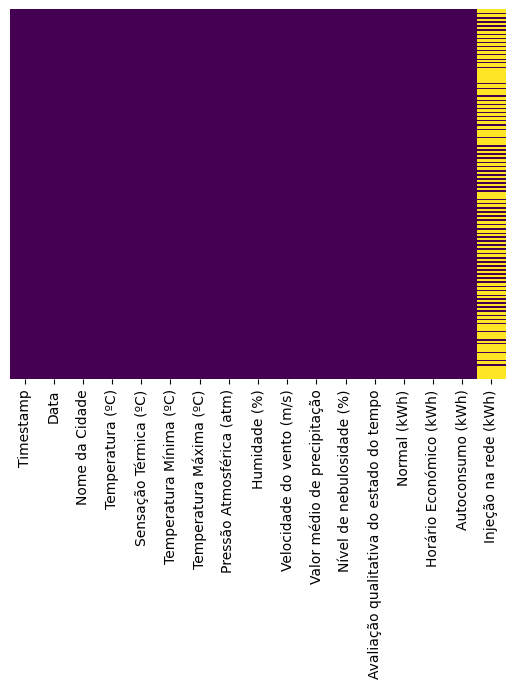

In [180]:
data['Valor médio de precipitação'] = data['Valor médio de precipitação'].fillna(0)
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Tratamento da coluna 'Injeção na rede(kWh)'

<Axes: >

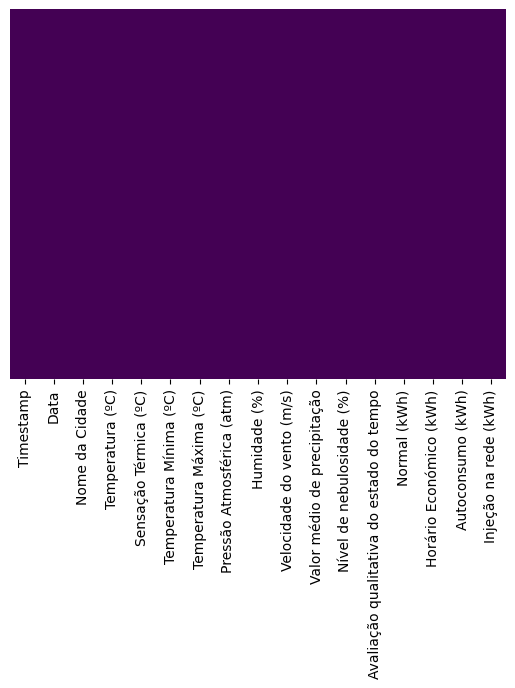

In [181]:
data['Injeção na rede (kWh)'] = data['Injeção na rede (kWh)'].fillna(0)
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [182]:
data

,Timestamp,Data,Nome da Cidade,Temperatura (ºC),Sensação Térmica (ºC),Temperatura Mínima (ºC),Temperatura Máxima (ºC),Pressão Atmosférica (atm),Humidade (%),Velocidade do vento (m/s),Valor médio de precipitação,Nível de nebulosidade (%),Avaliação qualitativa do estado do tempo,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,1632873600,2021-09-29 00:00:00,local,13.97,13.54,11.45,14.04,1027,81,1.96,0.00,87,overcast clouds,0.000,0.000,0.0,0
1,1632877200,2021-09-29 01:00:00,local,13.48,13.02,13.43,13.90,1028,82,1.83,0.00,91,overcast clouds,0.000,0.000,0.0,0
2,1632880800,2021-09-29 02:00:00,local,12.93,12.47,12.72,13.43,1027,84,1.96,0.00,93,overcast clouds,0.000,0.000,0.0,0
3,1632884400,2021-09-29 03:00:00,local,12.61,12.15,10.34,12.93,1027,85,1.85,0.00,95,overcast clouds,0.000,0.000,0.0,0
4,1632888000,2021-09-29 04:00:00,local,12.61,12.17,9.79,12.93,1027,86,1.83,0.00,93,overcast clouds,0.000,0.000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1672513200,2022-12-31 19:00:00,local,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,moderate rain,1.693,0.000,0.0,0
11012,1672516800,2022-12-31 20:00:00,local,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100,heavy intensity rain,1.327,0.000,0.0,0
11013,1672520400,2022-12-31 21:00:00,local,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,heavy intensity rain,0.757,0.000,0.0,0
11014,1672524000,2022-12-31 22:00:00,local,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100,moderate rain,0.000,0.675,0.0,0


### Analisar os dados

Analisar os valores para a coluna temp

In [183]:
data['Temperatura (ºC)'].value_counts()

Temperatura (ºC)
14.59    61
15.70    55
16.82    50
12.92    46
16.81    44
         ..
4.27      1
9.72      1
8.01      1
28.55     1
15.43     1
Name: count, Length: 2382, dtype: int64

Histograma 

<Axes: >

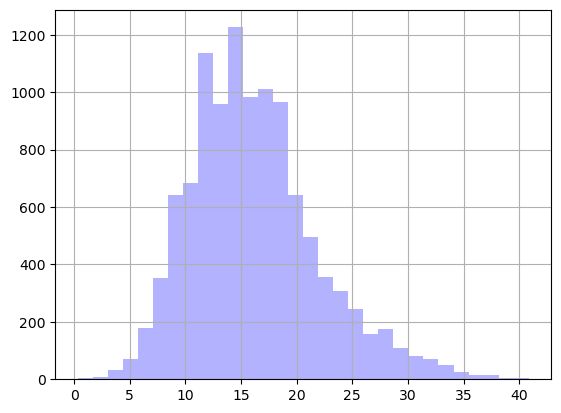

In [184]:
data['Temperatura (ºC)'].hist(bins=30, color='blue', alpha=0.3)

In [185]:
data['Avaliação qualitativa do estado do tempo'].value_counts()

Avaliação qualitativa do estado do tempo
sky is clear            3010
overcast clouds         2430
light rain              1662
broken clouds           1413
scattered clouds        1148
few clouds               731
moderate rain            562
heavy intensity rain      60
Name: count, dtype: int64

In [186]:
by_temp = data['Temperatura (ºC)'].groupby(data['Avaliação qualitativa do estado do tempo'])
print(by_temp.count())
print()
print(by_temp.mean())

Avaliação qualitativa do estado do tempo
broken clouds           1413
few clouds               731
heavy intensity rain      60
light rain              1662
moderate rain            562
overcast clouds         2430
scattered clouds        1148
sky is clear            3010
Name: Temperatura (ºC), dtype: int64

Avaliação qualitativa do estado do tempo
broken clouds           16.437657
few clouds              16.522763
heavy intensity rain    16.244333
light rain              14.994771
moderate rain           15.027740
overcast clouds         15.416708
scattered clouds        16.949408
sky is clear            17.177807
Name: Temperatura (ºC), dtype: float64


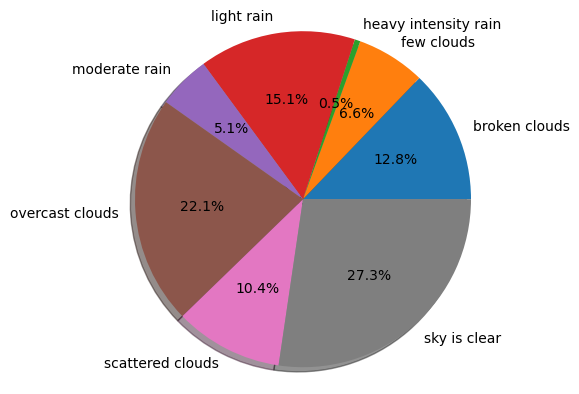

In [187]:
labels = data['Avaliação qualitativa do estado do tempo'].astype('category').cat.categories.tolist()
counts = data['Avaliação qualitativa do estado do tempo'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

Método de Pearson

<Axes: >

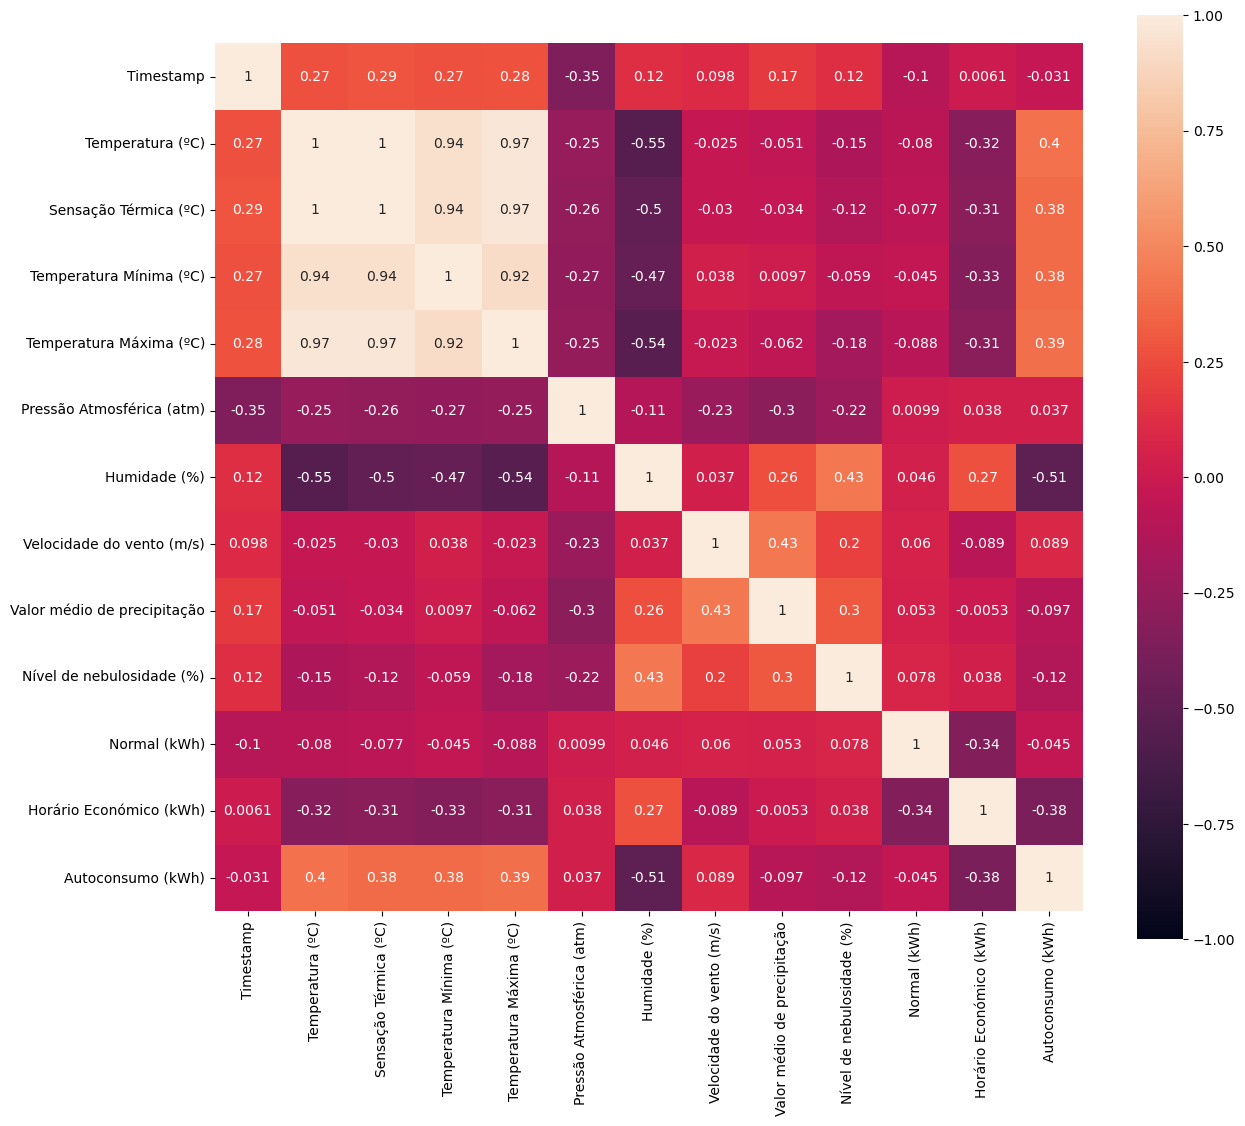

In [188]:
# Define data_non_categorical
data_non_categorical = data.select_dtypes(exclude=['object'])

# Pearson Method
corr_matrix = data_non_categorical.corr(method='pearson', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Método de Spearman

<Axes: >

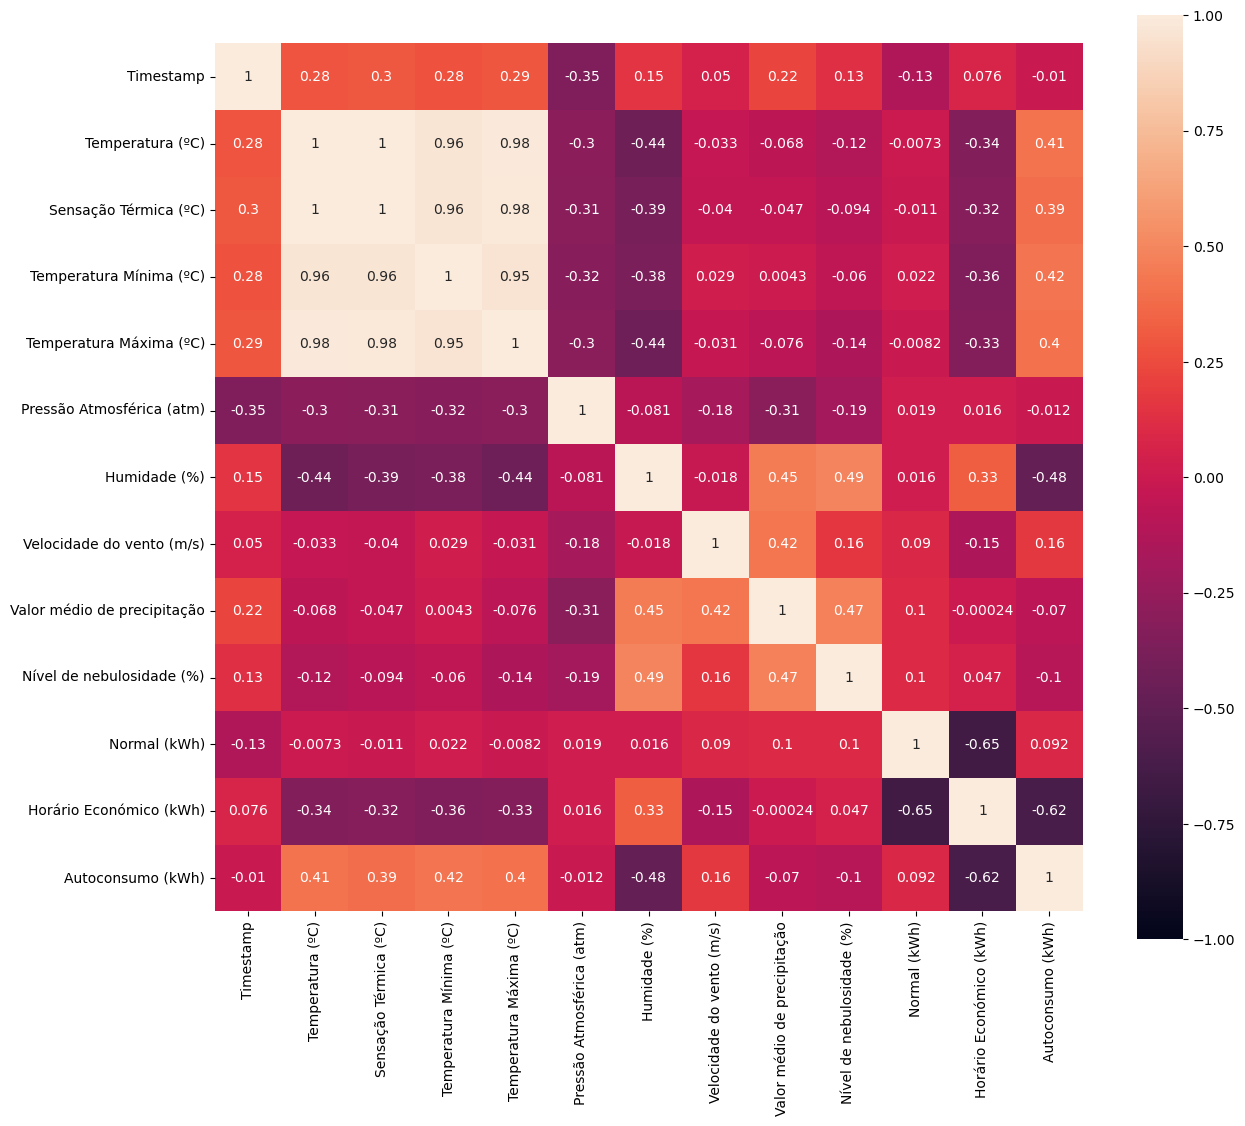

In [189]:
# Spearman method
corr_matrix = data_non_categorical.corr(method='spearman', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

Método de Kendall

<Axes: >

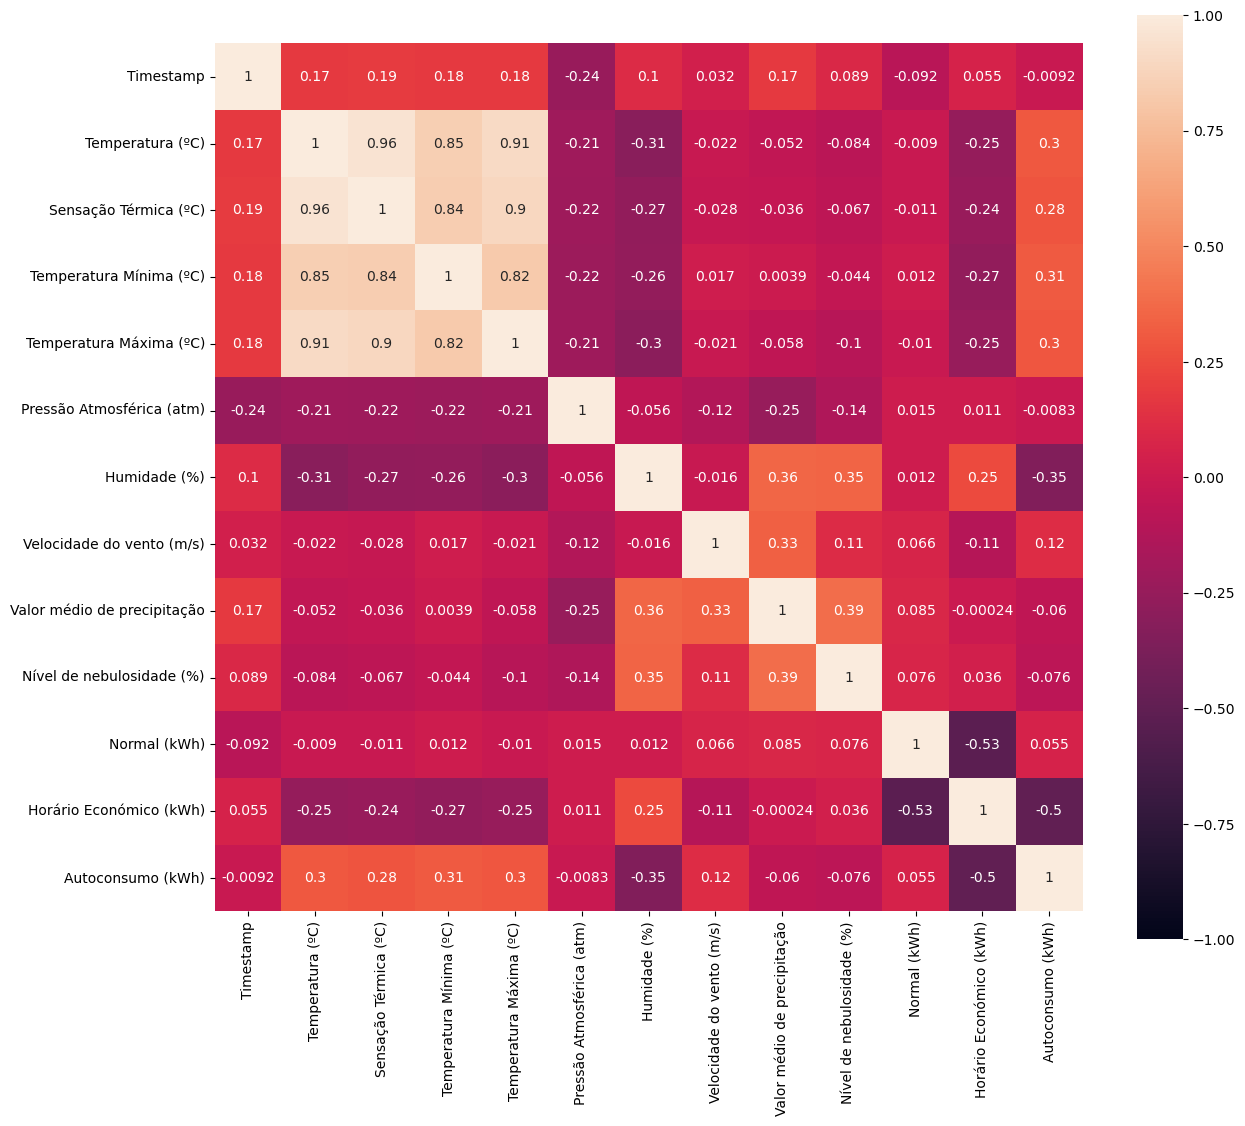

In [190]:
# Kendall method
corr_matrix = data_non_categorical.corr(method='kendall', numeric_only=True)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

### Análise multivariada

Analisar as relações entre múltiplas variáveis

/home/jpgoncalves13/miniconda3/envs/envNAME/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x800 with 0 Axes>

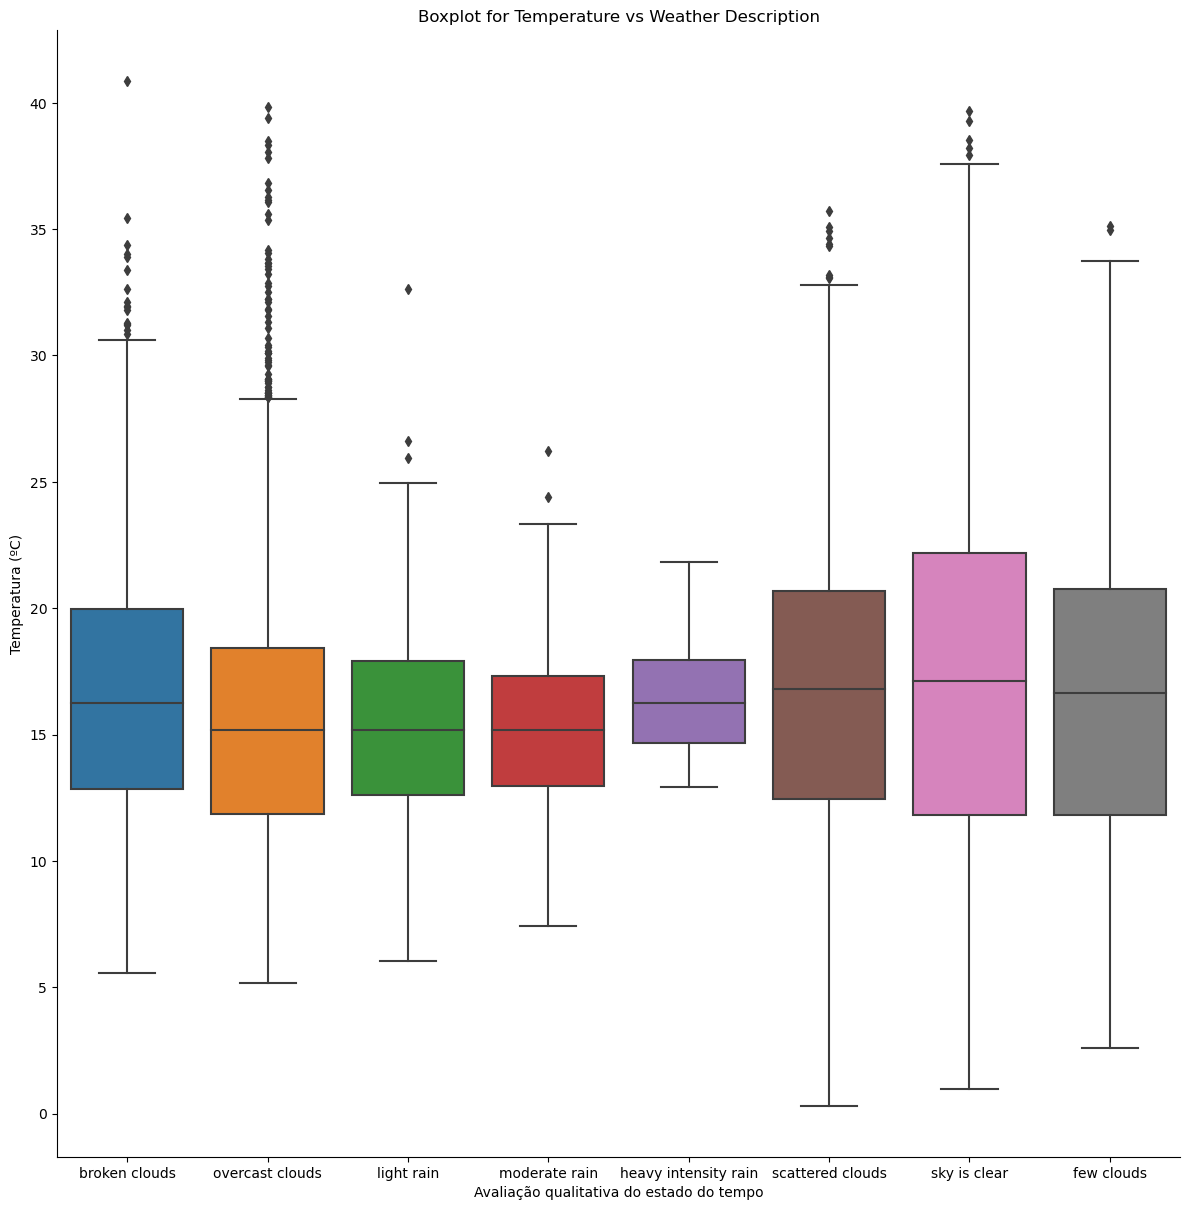

In [191]:
fig = plt.figure(figsize=(16, 8))
sns.catplot(y='Temperatura (ºC)', x='Avaliação qualitativa do estado do tempo', data=meteo, kind='box', aspect=1, orient='v', height=12)
plt.title('Boxplot for Temperature vs Weather Description')
plt.show()

Verificar outliers

In [194]:
q3 = data.groupby('Avaliação qualitativa do estado do tempo')['Temperatura (ºC)'].quantile(0.75).sort_values(ascending=False)
q1 = data.groupby('Avaliação qualitativa do estado do tempo')['Temperatura (ºC)'].quantile(0.25).sort_values(ascending=False)


data['temp_q1'] = data.groupby('Avaliação qualitativa do estado do tempo')['Temperatura (ºC)'].transform('quantile', 0.25)
data['temp_q3'] = data.groupby('Avaliação qualitativa do estado do tempo')['Temperatura (ºC)'].transform('quantile', 0.75)
data['temp_iqr'] = data['temp_q3'] - data['temp_q1']


#Retirar outliers
data_final = data[
    (data['Temperatura (ºC)'] <= data['temp_q3'] + 1.5 * data['temp_iqr']) &
    (data['Temperatura (ºC)'] >= data['temp_q1'] - 1.5 * data['temp_iqr'])
].drop(['temp_q1', 'temp_q3', 'temp_iqr'], axis=1)

data

,Timestamp,Data,Nome da Cidade,Temperatura (ºC),Sensação Térmica (ºC),Temperatura Mínima (ºC),Temperatura Máxima (ºC),Pressão Atmosférica (atm),Humidade (%),Velocidade do vento (m/s),Valor médio de precipitação,Nível de nebulosidade (%),Avaliação qualitativa do estado do tempo,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),temp_q1,temp_q3,temp_iqr
0,1632873600,2021-09-29 00:00:00,local,13.97,13.54,11.45,14.04,1027,81,1.96,0.00,87,overcast clouds,0.000,0.000,0.0,0,11.8000,17.97,6.1700
1,1632877200,2021-09-29 01:00:00,local,13.48,13.02,13.43,13.90,1028,82,1.83,0.00,91,overcast clouds,0.000,0.000,0.0,0,11.8000,17.97,6.1700
2,1632880800,2021-09-29 02:00:00,local,12.93,12.47,12.72,13.43,1027,84,1.96,0.00,93,overcast clouds,0.000,0.000,0.0,0,11.8000,17.97,6.1700
3,1632884400,2021-09-29 03:00:00,local,12.61,12.15,10.34,12.93,1027,85,1.85,0.00,95,overcast clouds,0.000,0.000,0.0,0,11.8000,17.97,6.1700
4,1632888000,2021-09-29 04:00:00,local,12.61,12.17,9.79,12.93,1027,86,1.83,0.00,93,overcast clouds,0.000,0.000,0.0,0,11.8000,17.97,6.1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1672513200,2022-12-31 19:00:00,local,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,moderate rain,1.693,0.000,0.0,0,12.9400,16.82,3.8800
11012,1672516800,2022-12-31 20:00:00,local,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100,heavy intensity rain,1.327,0.000,0.0,0,14.5875,17.30,2.7125
11013,1672520400,2022-12-31 21:00:00,local,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,heavy intensity rain,0.757,0.000,0.0,0,14.5875,17.30,2.7125
11014,1672524000,2022-12-31 22:00:00,local,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100,moderate rain,0.000,0.675,0.0,0,12.9400,16.82,3.8800
